- 정성엽_2018315006

## 5장의 원형큐 CircularQueue 클래스를 이용하여 이진트리 연산을 구현하라.   
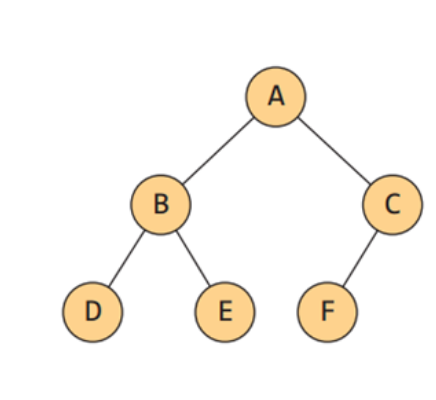  
### 노드: TNode(이진트리를 위한 노드 클래스) 
### 연산: preorder(전위순회), inorder(중위순회), postorder(후위순회), levelorder(레벨순회)   
### 노드개수: count_node
### 단말 노드수: , count_leaf
### 높이계산: calc_height  

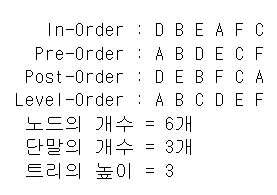

In [20]:
# 원형큐 CircularQueue 클래스 가져오기
MAX_QSIZE = 10
class CircularQueue :
    def __init__( self ) :
        self.front = 0
        self.rear = 0
        self.items = [None] * MAX_QSIZE
    def isEmpty( self ) : return self.front == self.rear
    def isFull( self ) : return self.front == (self.rear+1)%MAX_QSIZE
    def clear( self ) : self.front = self.rear
    def enqueue( self, item ):
        if not self.isFull():         
            self.rear = (self.rear+1)% MAX_QSIZE
            self.items[self.rear] = item   
    def dequeue( self ):
        if not self.isEmpty():            
            self.front = (self.front+1)% MAX_QSIZE
            return self.items[self.front]       
    def peek( self ):
        if not self.isEmpty():
            return self.items[(self.front + 1) % MAX_QSIZE]
    def size( self ) :
        return (self.rear - self.front + MAX_QSIZE) % MAX_QSIZE
    def display( self ):
        out = []
        if self.front < self.rear :
            out = self.items[self.front+1:self.rear+1]
        else:
            out = self.items[self.front+1:MAX_QSIZE] \
                + self.items[0:self.rear+1]
        print("[f=%s,r=%d] ==> "%(self.front, self.rear), out)

In [21]:
# TNode(이진트리를 위한 노드 클래스) 가져오기

class TNode:  #이진트리를 위한 노드 클래스
    def __init__ (self, data, left, right):
        self.data = data 
        self.left = left    #왼쪽 자식 링크
        self.right = right   #오른쪽 자식 링크
        

In [22]:
# 전위, 중위, 후위, 레벨 연산및 노드개수, 단말개수, 트리높이 연산 가져오기

def preorder(n):
    if n is not None:
        print(n.data, end=' ')
        perorder(n.left)
        perorder(n.right)

def inorder(n) :
    if n is not None :
        inorder(n.left)
        print(n.data, end=' ')
        inorder(n.right)
        
def postorder(n) :
    if n is not None :
        postorder(n.left)
        postorder(n.right)
        print(n.data, end=' ')        

def levelorder(root) :
    queue = CircularQueue()
    queue.enqueue(root)
    while not queue.isEmpty() :
        n = queue.dequeue()
        if n is not None :
            print(n.data, end=' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)

def count_node(n) : # 노드 개수
    if n is None : 
        return 0
    else : 
        return 1 + count_node(n.left) + count_node(n.right)
    
def count_leaf(n) : # 단말 노드의 수
    if n is None :
        return 0
    elif n.left is None and n.right is None :
        return 1
    else : 
        return count_leaf(n.left) + count_leaf(n.right)
    
def calc_height(n) : # 트리의 높이
    if n is None : 
        return 0
    hLeft = calc_height(n.left)
    hRight = calc_height(n.right)
    if (hLeft > hRight) : 
        return hLeft + 1
    else: 
        return hRight + 1
        

d = TNode('D', None, None)
e = TNode('E', None, None)
b = TNode('B', d, e)
f = TNode('F', None, None)
c = TNode('C', f, None)
root = TNode('A', b, c)

print('\n   In-Order : ', end='')
inorder(root)
print('\n  Pre-Order : ', end='')
preorder(root)
print('\n Post-Order : ', end='')
postorder(root)
print('\nLevel-Order : ', end='')
levelorder(root)
print()

print(" 노드의 개수 = %d개" % count_node(root))
print(" 단말의 개수 = %d개" % count_leaf(root))
print(" 트리의 높이 = %d" % calc_height(root))


   In-Order : D B E A F C 
  Pre-Order : A B D E C F 
 Post-Order : D E B F C A 
Level-Order : A B C D E F 
 노드의 개수 = 6개
 단말의 개수 = 3개
 트리의 높이 = 3
